### Exercícios - Moavi

1 - Frequency sort

In [35]:
def frequency_sort(items):
    items.sort() # ordena os itens da lista em ordem crescente e os agrupa
    ordered = sorted(items, key=items.count, reverse=True) # ordena os itens da lista por suas frequencias em ordem decrescente agrupados
    return ordered

list1 = [4, 6, 2, 2, 6, 4, 4, 4]

print(frequency_sort(list1))

[4, 4, 4, 4, 2, 2, 6, 6]


In [36]:
# Testes:

a = [4, 6, 2, 2, 6, 4, 4, 4]
b = [4, 6, 1, 2, 2, 1, 1, 6, 1, 1, 6, 4, 4, 1]
c = [17, 99, 42]
d = ['bob','bob','carl','alex','bob']

print('Teste 1 - Ok!') if frequency_sort(a) == [4, 4, 4, 4, 2, 2, 6, 6] else print('Erro')
print('Teste 2 - Ok!') if frequency_sort(b) == [1, 1, 1, 1, 1, 1, 4, 4, 4, 6, 6, 6, 2, 2] else print('Erro')
print('Teste 3 - Ok!') if frequency_sort(c) == [17, 42, 99] else print('Erro')
print('Teste 4 - Ok!') if frequency_sort(d) == ['bob','bob','bob','alex','carl']  else print('Erro')

Teste 1 - Ok!
Teste 2 - Ok!
Teste 3 - Ok!
Teste 4 - Ok!


2 - Reverse the vowels

In [37]:
def reverse_vowels(text):
    vogais = 'aeiouAEIOU'
    vogStr = ''
    for let in text: # Extrai as vogais da string e constroi uma nova string
        if let in vogais:
            vogStr += let
    inv_text = ''
    for let in text: # Constroi uma nova string a partir na string inicial
        if let in vogais:
            inv_text += vogStr[-1] # Coloca a ultima string no lugar da primeira na nova string
            vogStr = vogStr[:-1] # pula para a vogal anterior para a próxima verificação que retornar uma vogal
        else:
            inv_text += let # adiciona a letra verificada à string caso ela não seja uma vogal
    return inv_text

print(reverse_vowels('Bengt Hilgursson'))

Bongt Hulgirssen


In [38]:
# Testes:

a = 'Bengt Hilgursson'
b = 'Why do you laugh? I chose the death.'
c = 'These are the people you protect with your pain!'
d = 'We had to sacrifice a couple of miners to free Bolivia.'

print('Teste 1 - Ok!') if reverse_vowels(a) == 'Bongt Hulgirssen' else print('Erro')
print('Teste 2 - Ok!') if reverse_vowels(b) == 'Why da yee leogh? I chusa thu dooth.'  else print('Erro')
print('Teste 3 - Ok!') if reverse_vowels(c) == 'Thisa uro thi peoplu yoe protect weth year peen!' else print('Erro')
print('Teste 4 - Ok!') if reverse_vowels(d) == 'Wa hid ti socrefeco e ciople uf monars te frii Balovae.'  else print('Erro')

Teste 1 - Ok!
Teste 2 - Ok!
Teste 3 - Ok!
Teste 4 - Ok!


3 - Collapse positive integer intervals

In [39]:
def collapse_intervals(items):
    ini = []
    fin = []
    interv = []
    
    for i in range(len(items)): # separa os itens iniciais das sequencias
        if items[i] != items[i-1] + 1:
            ini.append(items[i])
    
    items = items[::-1] # separa os itens finais das sequencias
    for i in range(len(items)):
        if items[i] != items[i-1] - 1:
            fin.append(items[i])
    fin.sort()
    
    for j in range(len(ini)): # constroi as sequencias no formato string
        if ini[j] == fin[j]:
            interv.append(str(ini[j]))
        else:
            interv.append(str(ini[j]) +'-' + str(fin[j]))
    
    res = ','.join(interv) # converte todas as sequencias em uma unica string
    
    return res

teste = [1, 2, 4, 6, 7, 8, 9, 10, 12, 13]

print(collapse_intervals(teste))

1-2,4,6-10,12-13


In [40]:
# Testes:

a = [1, 2, 4, 6, 7, 8, 9, 10, 12, 13]
b = [42]
c = [3, 5, 6, 7, 9, 11, 12, 13]
d = []
e = range(1, 1000001)

print('Teste 1 - Ok!') if collapse_intervals(a) == '1-2,4,6-10,12-13' else print('Erro')
print('Teste 2 - Ok!') if collapse_intervals(b) == '42' else print('Erro')
print('Teste 3 - Ok!') if collapse_intervals(c) == '3,5-7,9,11-13' else print('Erro')
print('Teste 4 - Ok!') if collapse_intervals(d) == '' else print('Erro')
print('Teste 5 - Ok!') if collapse_intervals(e) == '1-1000000' else print('Erro')

Teste 1 - Ok!
Teste 2 - Ok!
Teste 3 - Ok!
Teste 4 - Ok!
Teste 5 - Ok!


4 - Calculate employee distribution

In [41]:
def calc_employee_dist(filepath):
    import pandas as pd
    import datetime as dt
    keys = range(0,1440,10) # cria uma lista com todos os intervalos de 10 dentro de 24h
    data = pd.read_csv(filepath) # carrega o .csv
    for i in data.columns: 
        data[i] = pd.to_datetime(data[i]) # converte os dados para o formato de hora
        data[i] = data[i].dt.hour * 60 + data[i].dt.minute # transforma os horários em minutos
    for i in range(len(data)): # atribui o valor em minutos de 24h para a saída final com valor 0
        if data.loc[i,'s2'] == 0:
            data.loc[i,'s2'] = data.loc[i,'s2'] + 1440
    x = [] # recebe os intervalos de 10 minutos das etapas de trabalho de cada trabalhador
    for j in range(len(data)): # calcula os intervalos da primeira etapa
        i = data.loc[j,'e1']
        while i < data.loc[j,'s1']:
            x.append(i)
            i += 10
    for j in range(len(data)): # calcula os intervalos da segunda etapa
        i = data.loc[j,'e2']
        while i < data.loc[j,'s2']:
            x.append(i)
            i += 10
    y = [] # recebe a contagem de trabalhadores ativos em cada intervalo de 10 minutos
    for i in keys: # conta os trabalhadores em cada intervalo
        y.append(x.count(i))
    return y

print(calc_employee_dist('data.csv'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]


In [42]:
# Teste:
a = 'data.csv'
print('Teste 1 - Ok!') if calc_employee_dist(a) == [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 
1,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2, 
2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,2,2,2,2,3,3,3,3,3,2,2,2, 
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,2,2,2, 
2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2, 
2,2,2,2,2,2,2,1,1,1] else print('Erro')

Teste 1 - Ok!


Tratamento de Erros

In [43]:
b = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 
1,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2, 
2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,2,2,2,2,3,3,3,3,3,2,2,2, 
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,2,2,2, 
2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2, 
2,2,2,2,2,2,2,1,1,1]

c = calc_employee_dist('data.csv')

keys = [i for i in range(0,1440,10)]

x = []

for i in range(len(b)):
    if b[i] == c[i]:
        x.append('ok')
    else:
        x.append('erro')
print(b)
print(c)
print(keys)
print(len(b), len(c), len(keys))
print(x.count('ok'))
print(x.count('erro'))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280,

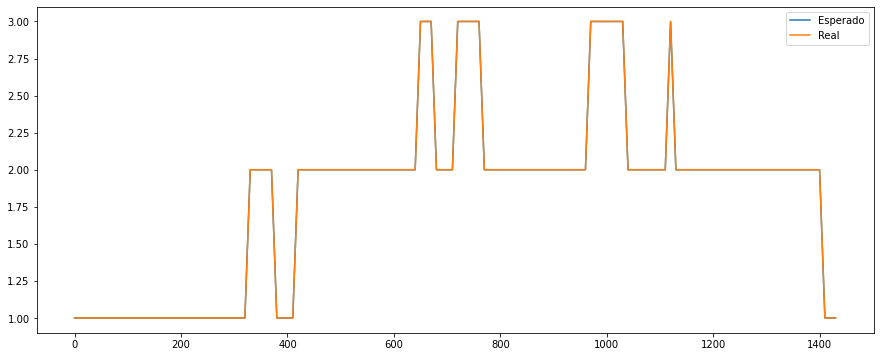

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))
ax = plt.axes()

ax.plot(keys, b, label='Esperado')
ax.plot(keys, c, label='Real')
ax.legend()

Construção da Solução:

In [45]:
keys = [i for i in range(0,1440,10)]
len(keys)

144

In [46]:
import pandas as pd
data = pd.read_csv('data.csv')
data

,e1,s1,e2,s2
0,00:00,04:50,05:30,08:00
1,04:50,06:20,07:00,12:50
2,08:00,11:20,12:00,16:00
3,10:50,15:30,16:10,18:50
4,15:30,17:20,18:00,23:30
5,16:00,18:00,18:40,00:00


In [47]:
data.dtypes
data.columns

Index(['e1', 's1', 'e2', 's2'], dtype='object')

In [48]:
import datetime as dt
for i in data.columns:
    data[i] = pd.to_datetime(data[i])
    data[i] = data[i].dt.hour * 60 + data[i].dt.minute

data

,e1,s1,e2,s2
0,0,290,330,480
1,290,380,420,770
2,480,680,720,960
3,650,930,970,1130
4,930,1040,1080,1410
5,960,1080,1120,0


In [49]:
for i in range(len(data)):
    import datetime as dt
    if data.loc[i,'s2'] == 0:
        data.loc[i,'s2'] = data.loc[i,'s2'] + 1430
        
data

,e1,s1,e2,s2
0,0,290,330,480
1,290,380,420,770
2,480,680,720,960
3,650,930,970,1130
4,930,1040,1080,1410
5,960,1080,1120,1430


In [50]:
data.dtypes

e1    int64
s1    int64
e2    int64
s2    int64
dtype: object

In [51]:
len(data)

6

In [52]:
x = []
for j in range(len(data)):    
    i = data['e1'].iloc[j]
    while i <= data['s1'].iloc[j]:
        x.append(i)
        i += 10
for j in range(len(data)):    
    i = data['e2'].iloc[j]
    while i <= data['s2'].iloc[j]:
        x.append(i)
        i += 10
    #x.append(y)
    
#x = pd.DataFrame(x)

y = []

for i in keys:
    y.append(x.count(i))
    
len(y)

144

In [53]:
print(keys)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430]
